# KHF 1

## 1st Task

- First we have to install the Python Image Library to open various image files ([Pillow]( https://pillow.readthedocs.io/en/stable/) is a fork of PIL)

In [29]:
! pip install pillow

- download all images from my google drive folder

In [36]:
! curl -L -o 1.png "https://drive.google.com/uc?export=download&id=1fhrtnxty4jtbmrI6C_7w_0WViu61iKKL"
! curl -L -o 2.png "https://drive.google.com/uc?export=download&id=1yG7F8QgEoZ5HL8CarI3mXXsFRcYFRiWi"
! curl -L -o 3.png "https://drive.google.com/uc?export=download&id=1l-Iujd2TiwQBGUjRcIkDvPQif-oowVXe"
! curl -L -o 4.png "https://drive.google.com/uc?export=download&id=1OsJdKVL7-_MTv9418AaC3LTPqjlBklsW"
! curl -L -o 5.png "https://drive.google.com/uc?export=download&id=1eY5V7iL-UMDHmS0HugNQYju6VOUDwzzX"

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 24349  100 24349    0     0  30063      0 --:--:-- --:--:-- --:--:-- 30063
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  105k  100  105k    0     0   148k      0 --:--:-- --:--:-- --:--:--  148k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 61259  100 61259    0     0  82138      0 --:--:-- --:--:-- --:--:-- 82138
  % Total    % Received % Xferd  Average Speed   Tim

![](./1.png)
![](./2.png)
![](./3.png)
![](./4.png)
![](./5.png)

- using list comprehensions we reshape the image data into a 256 by 256 array of 3 element tuples

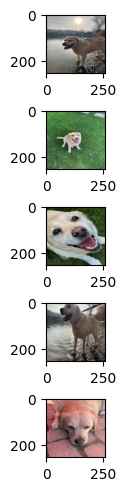

In [39]:
from PIL import Image
import numpy as np
import requests as rq
import matplotlib.pyplot as plt

images = [Image.open(f"{image}.png") for image in range(1, 6)]

rgb_values = [np.array(image.getdata()).reshape(256, 256, 3) for image in images]

fig, axs = plt.subplots(nrows = 5, layout="constrained")

for i, image in enumerate(rgb_values):
    axs[i].imshow(image)

plt.show()

- we create 5 histograms and display the red, green, blue values in an overlapping manner

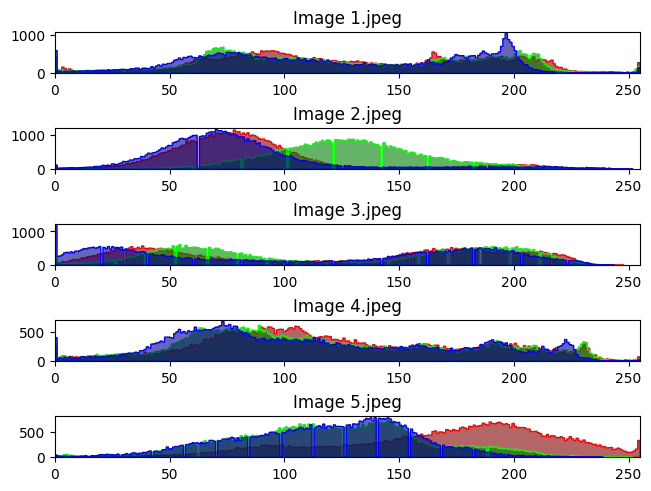

In [8]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(nrows = len(rgb_values))

for i, image in enumerate(rgb_values):
    axs[i].hist(image[:, :, 0].flatten(), histtype='stepfilled', bins=256, fc=(0.5, 0, 0, 0.6), ec=(1, 0, 0))
    axs[i].hist(image[:, :, 1].flatten(), histtype='stepfilled', bins=256, fc=(0, 0.5, 0, 0.6), ec=(0, 1, 0))
    axs[i].hist(image[:, :, 2].flatten(), histtype='stepfilled', bins=256, fc=(0, 0, 0.5, 0.6), ec=(0, 0, 1))
    axs[i].set(xlim=(0, 255))
    axs[i].set_title(f"Image {i+1}.jpeg")

fig.set_layout_engine("constrained")
plt.show()

In [9]:
def standardize(array: np.ndarray) -> np.ndarray:
    mean = array.mean()
    std = array.std()
    return (array - mean) / std

for i, image in enumerate(rgb_values):
    print(f"Image {i+1}")
    (red, green, blue) = (image[:, :, 0].flatten(), image[:, :, 1].flatten(), image[:, :, 2].flatten())
    print(f"mean: red = {red.mean()}, green = {green.mean()}, blue = {blue.mean()}")
    print(f"standard deviation: red = {red.std()}, green = {green.std()}, blue = {blue.std()}")
    print("Standardizing array...")
    (red, green, blue) = (standardize(red), standardize(green), standardize(blue))
    print(f"mean: red = {red.mean()}, green = {green.mean()}, blue = {blue.mean()}")
    print(f"standard deviation: red = {red.std()}, green = {green.std()}, blue = {blue.std()}")

Image 1
mean: red = 129.31117248535156, green = 126.22615051269531, blue = 122.25886535644531
standard deviation: red = 56.26702097884492, green = 57.656781049496274, blue = 56.832835147990615
Standardizing array...
mean: red = 0.0, green = -5.551115123125783e-17, blue = 0.0
standard deviation: red = 1.0, green = 1.0, blue = 1.0
Image 2
mean: red = 87.02581787109375, green = 127.73237609863281, blue = 81.12176513671875
standard deviation: red = 41.581930578377815, green = 34.02091855817746, blue = 41.23209918655131
Standardizing array...
mean: red = 8.673617379884035e-19, green = -1.2576745200831851e-17, blue = -2.6020852139652106e-18
standard deviation: red = 1.0, green = 1.0, blue = 0.9999999999999998
Image 3
mean: red = 119.86570739746094, green = 123.92958068847656, blue = 110.76808166503906
standard deviation: red = 70.9413724906232, green = 65.36862846118872, blue = 74.125773595801
Standardizing array...
mean: red = -2.7755575615628914e-17, green = 2.0816681711721685e-17, blue = 

## Task 3

- scipy is used for reading the sound files

In [11]:
! pip install scipy

- with the requests library we download the sound files into the current folder
- the first sound file is star wars jezz music and the second file is human speech

In [25]:
# for data transformation
import numpy as np
# for visualizing the data
import matplotlib.pyplot as plt
# for opening the media file
import scipy.io.wavfile as wavfile

audio_links = ["https://www2.cs.uic.edu/~i101/SoundFiles/CantinaBand3.wav", "https://www2.cs.uic.edu/~i101/SoundFiles/gettysburg10.wav"]

for i in audio_links:
    data = rq.get(i).content
    print(f"{i.split('/')[-1]}")
    with open(f"{i.split('/')[-1]}", "wb") as file:
        file.write(data)

audio_files = [f"{link.split('/')[-1]}" for link in audio_links]

CantinaBand3.wav
gettysburg10.wav


- read the sound files with the wavfile.read method which returns the sampling rate and the frequencies

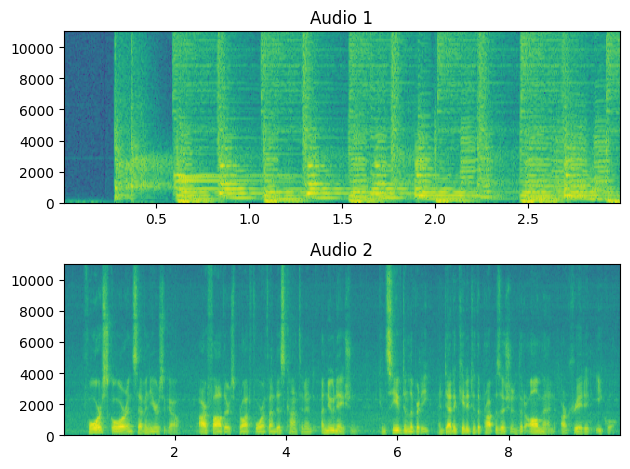

In [26]:
fig, axs = plt.subplots(nrows=2)
for i, audio_file in enumerate(audio_files):
    Fs, aud = wavfile.read(audio_file)
    axs[i].specgram(aud, Fs=Fs)
    axs[i].set_title(f"Audio {i+1}")

fig.tight_layout()
plt.show()

- using the same standardization function as the previous task

In [27]:
for i, audio_file in enumerate(audio_files):
    print(f"Audio {i+1}")
    Fs, aud = wavfile.read(audio_file)
    aud = np.array(aud)
    print(f"mean: {aud.mean()}")
    print(f"standard deviation: {aud.std()}")
    print("Standardizing array...")

    aud = standardize(aud)
    print(f"mean: {aud.mean()}")
    print(f"standard deviation: {aud.std()}")

Audio 1
mean: -2.556130007558579
standard deviation: 1375.4416663795082
Standardizing array...
mean: 6.444832070386396e-19
standard deviation: 1.0000000000000002
Audio 2
mean: -0.6540205288165101
standard deviation: 1146.561886801706
Standardizing array...
mean: 8.834751427324339e-18
standard deviation: 1.0


## Task 5

In [15]:
! pip install requests

- download the website as text

In [18]:
import requests as rq

text = rq.get("http://smartlab.tmit.bme.hu/oktatas-deep-learning").text

- we put the whole website text data in lowercase into the counter class which counts each letter
- then with dictionary comprehension we remove everything that's not a letter

In [21]:
from collections import Counter

c = Counter(text.lower())
c = {k: v for k, v in c.items() if k.isalpha()}

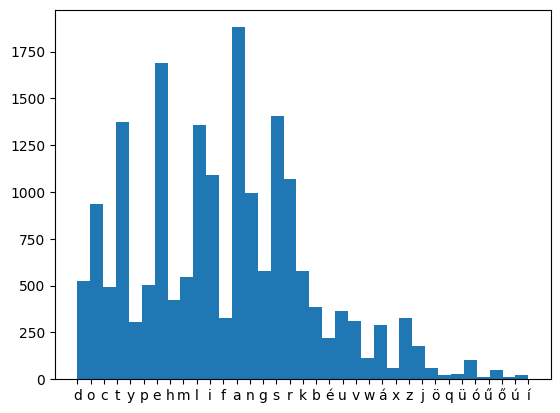

In [22]:
plt.hist(c.keys(), len(c), weights=c.values())
plt.show()